In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-05-29 01:25:21.680126


# Creating Data to View and Fit

In [3]:
from sklearn.datasets import make_circles

# make 100 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
# Check out the features
print(len(X))

X

1000


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# check the lables
print(len(y))

y

1000


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## The current data is little hard to understand now, so let's visualize it!

In [6]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0],
                        "X1":X[:, 1],
                        "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


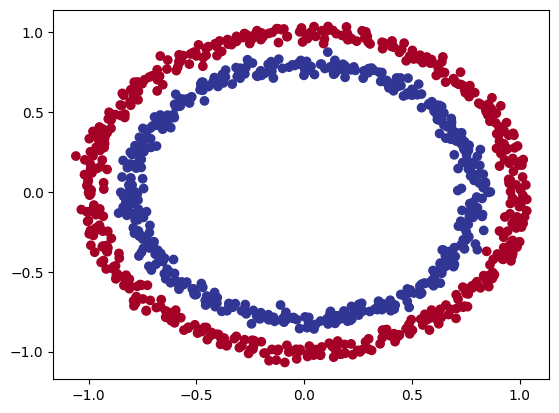

In [7]:
# Visualize with a Plot

import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

# Input and Output Shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# how many samples we are working with
len(X), len(y)

(1000, 1000)

In [10]:
 # View the first example of features and labels
 X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in Modelling
In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

- **Creating a model** - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
- **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
- **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Sequential API to build a model for our regression data. And then we'

In [11]:
import tensorflow as tf

# set the random seed
tf.random.set_seed(42)


# create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 6.3761 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.3607 - accuracy: 0.4820
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 6.3577 - accuracy: 0.4820
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 6.3566 - accuracy: 0.4820
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 6.3554 - accuracy: 0.4820


In [12]:
# Try and improve our model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 5.7976 - accuracy: 0.4830


[5.797610759735107, 0.4830000102519989]

Our model is simply as good as guessing right now. so we need to try and improve it like we did in the regression problem.

In [13]:
# Set the random seed
tf.random.set_seed(42)


# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


# compile
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.693509578704834, 0.5]

# Improve Our Model
- adding layers
- increase the number of hidden units
- change the activation function
- change the optimization function
- change the learning rate
- fit on more data
- fit for longer

In [15]:
# Set the random seed
tf.random.set_seed(42)

# create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 2.3888 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7124 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4470
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5190
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 11/

In [16]:
# evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5100


[0.6999964714050293, 0.5099999904632568]

In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Creating a plotting function
to visualize our model's predictions, let's create a function 'plot decision boundary'.
- Take in a trained model, features(X) and labels(y)
- create a meshgrid of the different X values
- make predictions across the meshgrid
- plot the predictions as well as a line between zones (where each unique class falls)


In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


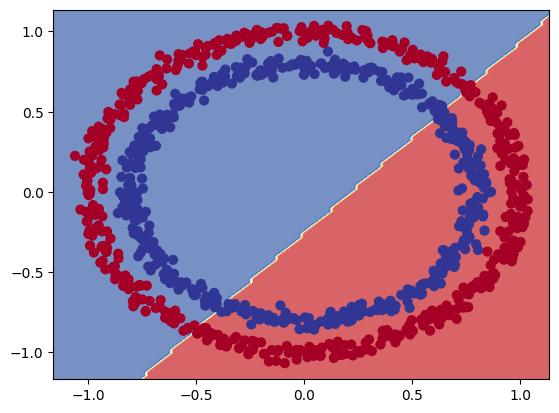

In [19]:
# check the model predictions
plot_decision_boundary(model_3, X, y)

The missing piece: Non-linearity
Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

In [20]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])


# compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.2034 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8112 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5783 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4709 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4314 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4173 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4080 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4001 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3930 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3864 - accuracy: 0.4760
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


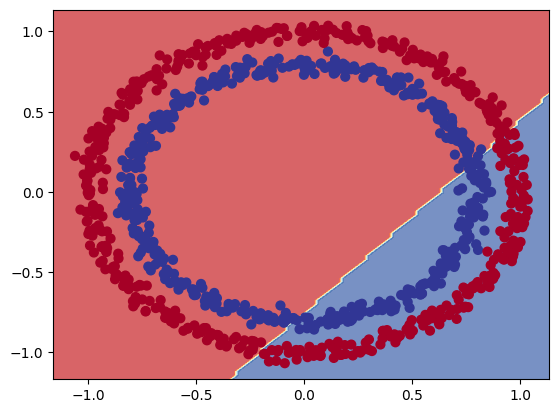

In [21]:
# check the decision boundary of model_4
plot_decision_boundary(model_4, X, y)

Let's try to build a neural network with non-linear activation function

In [22]:
tf.random.set_seed(42)


# create a model witha a non-linear activataion
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3043 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2361 - accuracy: 0.4610
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2016 - accuracy: 0.4630
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1169 - accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0581 - accuracy: 0.4600
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9888 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9520 - accuracy: 0.4600
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8643 - accuracy: 0.4610
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7635 - accuracy: 0.4650
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7131 - accuracy: 0.4660
Epoch 11/

## Try to increase the number of layers and activation function for each layer

In [23]:
# set the seed
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

# compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ["accuracy"])


# fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.8104 - accuracy: 0.0980
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5576 - accuracy: 0.1050
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4841 - accuracy: 0.1090
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4141 - accuracy: 0.1080
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3279 - accuracy: 0.1070
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2360 - accuracy: 0.1100
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1666 - accuracy: 0.1090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1444 - accuracy: 0.1140
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1041 - accuracy: 0.1170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0433 - accuracy: 0.1380
Epoch 11/

In [24]:
# evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.1460


[0.7011902928352356, 0.1459999978542328]

# Creating a slightly more augmented Model



In [25]:
# set the seed
tf.random.set_seed(42)

# create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ["accuracy"])


# fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.7095 - accuracy: 0.4970
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.4990
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.4940
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4970
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4990
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4990
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5030
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5080
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5140
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5110
Epoch 11/

In [26]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9940


[0.2229601889848709, 0.9940000176429749]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


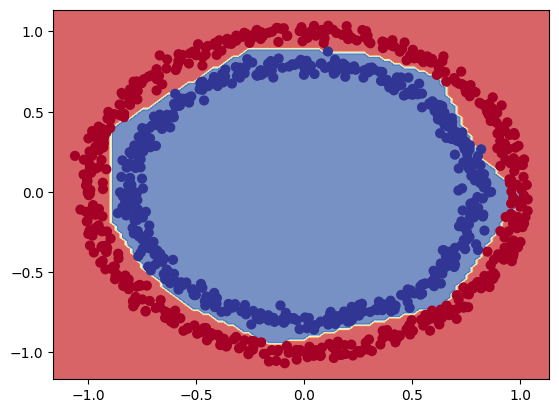

In [27]:
# visualize the model predictions
plot_decision_boundary(model_7, X, y)

# Diving Deeper into Non-linearity

In [28]:
# create a toy tensor (similar to what we have been passing to our datase)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

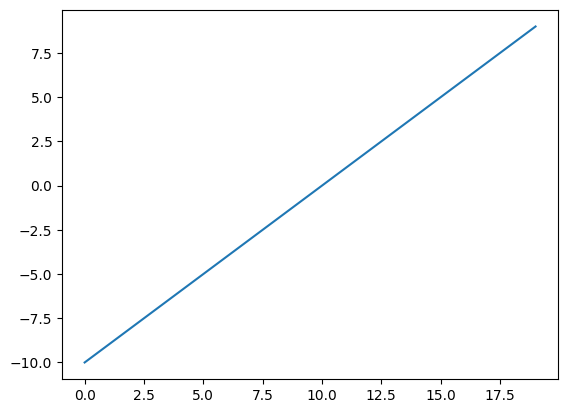

In [29]:
# Visualize our toy tensor
plt.plot(A)

Nice, now let's recreate the sigmoid function and see what it does to our data. We can also find a pre-built sigmoid function at tf.keras.activations.sigmoid

In [30]:
# Replicating the sigmoid

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

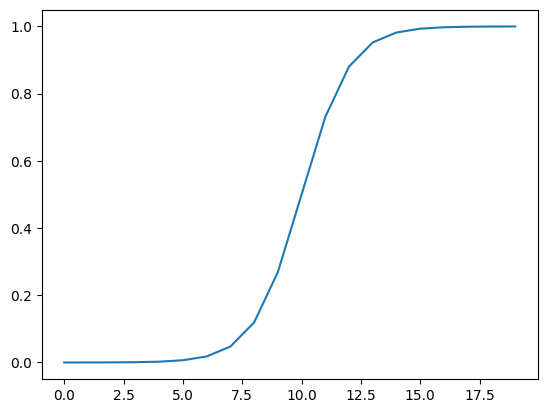

In [31]:
# plot the toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

## Relu Function

In [32]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

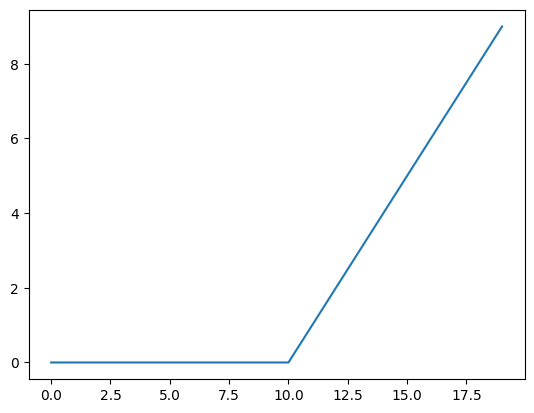

In [33]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [34]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [35]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the Extra Curriculum section below.


https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#

# **Evaluating and Improving our Classification Model**

till now we are evaluating our model performance on the same data as the training data. Now, we will split it into train and test dataset.

In [36]:
# How many examples are in the whole dataset?
len(X)

1000

In [37]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

### Modelling on Training and Evaluating on Test dataset

In [38]:
# Recreate our model

# set the seed
tf.random.set_seed(42)

# create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

# fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5537
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5437
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5562
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5888
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5875
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.5838
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6363
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6100
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6463
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.6900
Epoch 11/

In [39]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (32, 4)                   12        
                                                                 
 dense_15 (Dense)            (32, 4)                   20        
                                                                 
 dense_16 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# evaluate on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9900


[0.06249318644404411, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


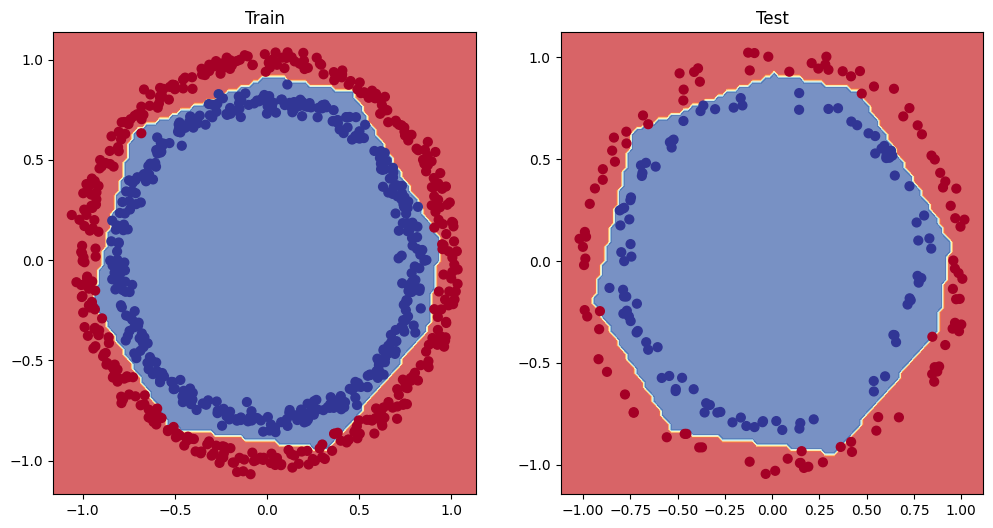

In [41]:
# plot the decision boundary for training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

# **Plotting Loss Curves**
Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [42]:
history.history

{'loss': [0.686798632144928,
  0.6817789673805237,
  0.6778736114501953,
  0.6746845245361328,
  0.669689416885376,
  0.6630606651306152,
  0.6533350944519043,
  0.645002007484436,
  0.6347971558570862,
  0.6198682188987732,
  0.61232990026474,
  0.596809983253479,
  0.5839800834655762,
  0.5665560364723206,
  0.5473278164863586,
  0.5272448062896729,
  0.4985274374485016,
  0.46899184584617615,
  0.4353429079055786,
  0.3783087134361267,
  0.33870652318000793,
  0.31207141280174255,
  0.2768471837043762,
  0.2603411376476288,
  0.24520131945610046,
  0.22655145823955536,
  0.21146142482757568,
  0.20748724043369293,
  0.18982341885566711,
  0.18619441986083984,
  0.17605377733707428,
  0.16958068311214447,
  0.16251109540462494,
  0.15518152713775635,
  0.152674600481987,
  0.14970548450946808,
  0.1402852088212967,
  0.13548219203948975,
  0.13490848243236542,
  0.12973281741142273,
  0.12434133887290955,
  0.13640685379505157,
  0.11748072504997253,
  0.11412828415632248,
  0.115140

In [43]:
# convert this into a df
pd.DataFrame(history.history)

,loss,accuracy
0,0.686799,0.55375
1,0.681779,0.54375
2,0.677874,0.55625
3,0.674685,0.58875
4,0.669689,0.58750
...,...,...
95,0.051820,0.99375
96,0.074141,0.97625
97,0.048853,0.99375
98,0.052550,0.99125


Text(0.5, 1.0, 'Model 8 Loss Curve')

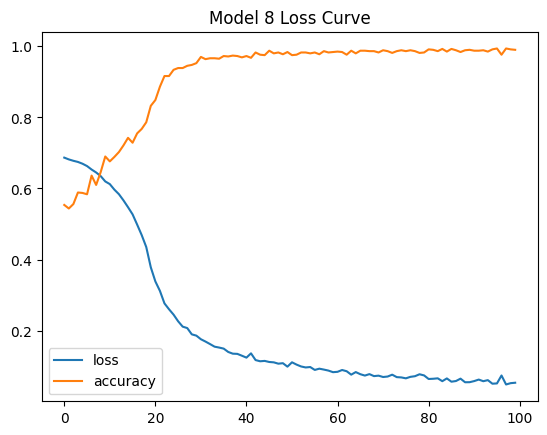

In [44]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 8 Loss Curve")

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

# **Finding the best Learning Rate**

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.


Put it this way, it was a lucky guess.
I just decided to try a lower learning rate and see how the model went.
"Seriously? You can do that?"
And the answer is yes. You can change any of the hyperparamaters of your neural networks.


A trick which will help us to find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
- A **learning rate callback**.
You can think of a callback as an extra piece of functionality you can add to your model while its training.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler

- Another model (we could use the same ones as above, we we're practicing building models here).
- A modified loss curves plot.

In [45]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7043 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

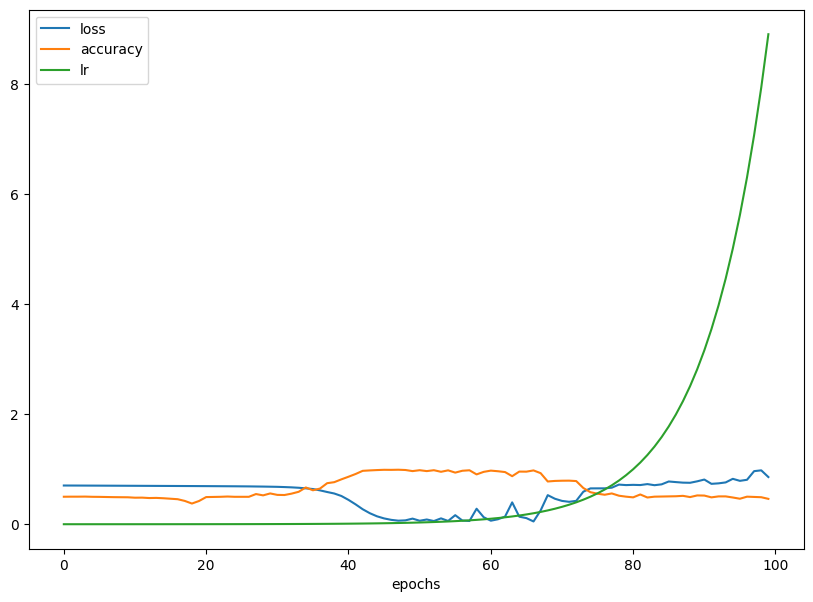

In [46]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

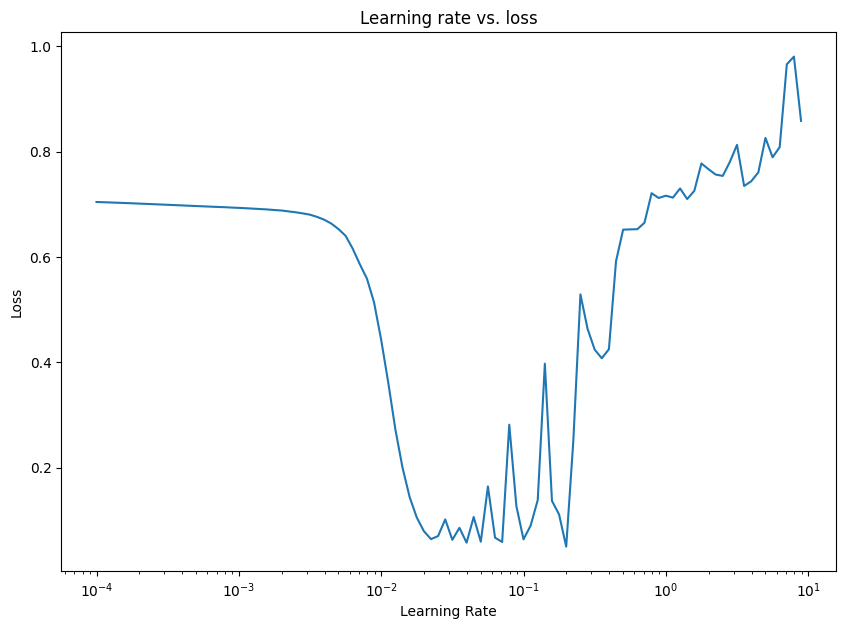

In [47]:
# Plot the Learning RAte vs the Loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 (
) and 0.02.


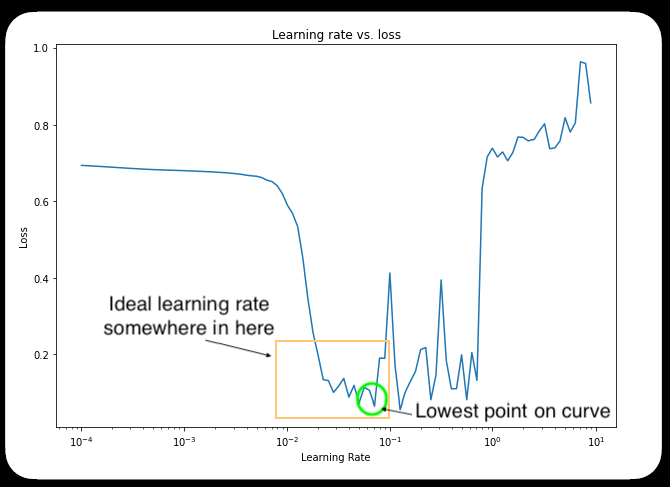


The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).

In [48]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

### **Recreate our model (based on the ideal larning rate from the curve above at 0.02)**

In [49]:
# set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5638
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5875
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6275
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7425
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7163
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7788
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8263
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8363
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8450
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8587
Epoch 11/20
25/25 [

Nice! With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

In [50]:
# evaluate model 10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9450


[0.1803632378578186, 0.9449999928474426]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


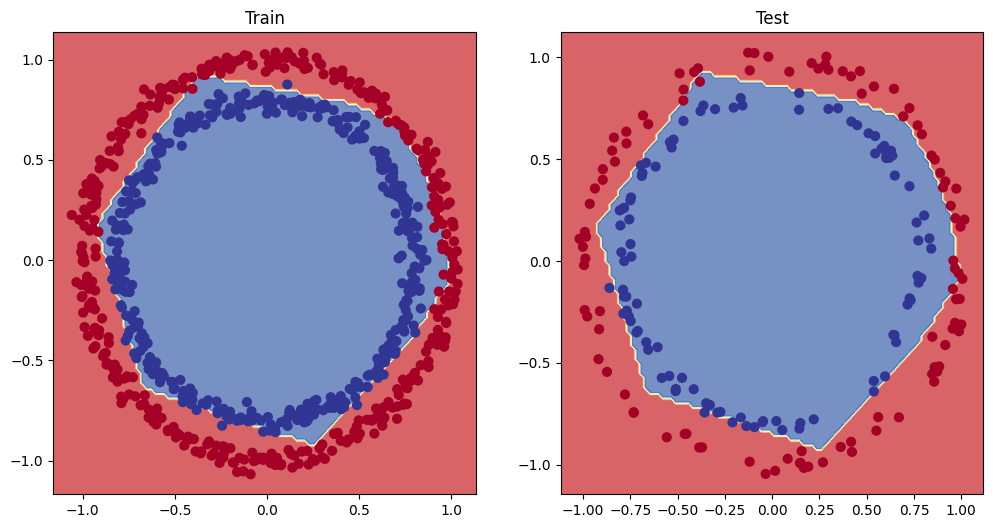

In [51]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

# **Classification Evaluation Metrics**

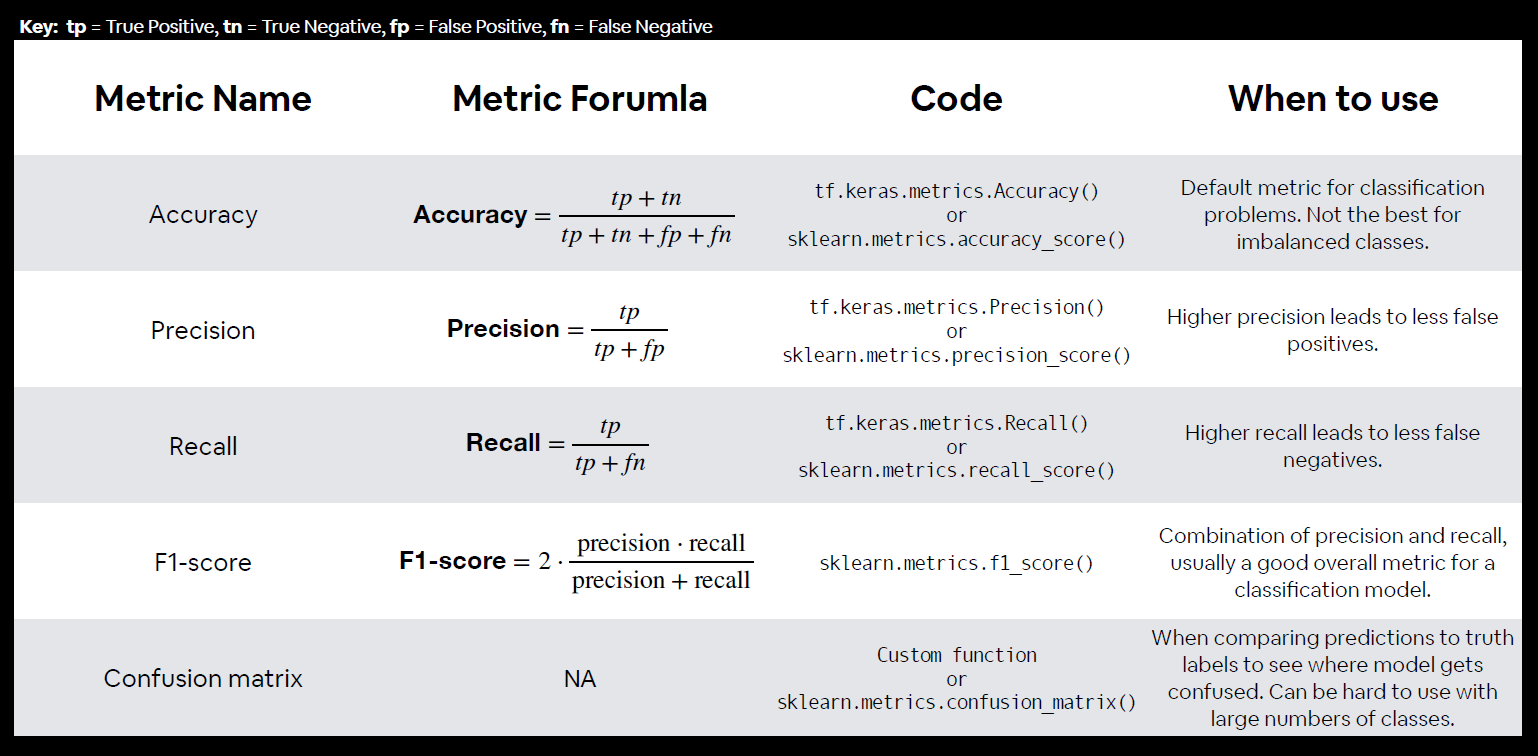

In [52]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9450
Model loss on test set: 0.1803632378578186
Model accuracy on test set: 94.50%


# Creating a Confusion Matrix

In [56]:
# from sklearn.metrics import confusion_matrix

# # make some predictions
# y_preds = model_10.predict(X_test)

# # create the confustion matrix
# confusion_matrix(y_test, y_preds)




# The above code throws an error because our predictions aren't in the correct format

In [57]:
# looking at the first 10 predictions
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [58]:
# looking the first 10 predictions
y_preds = model_10.predict(X_test)
y_preds[:10]

7/7 [==============================] - 0s 2ms/step


array([[0.7771085 ],
       [0.9452545 ],
       [0.867248  ],
       [0.9388394 ],
       [0.11859187],
       [0.06788929],
       [0.8162233 ],
       [0.18132567],
       [0.77686286],
       [0.48072204]], dtype=float32)

It looks like we need to get our predictions into the binary format (0 or 1).


In their current format (9.8526537e-01), they're in a form called **prediction probabilities.**

**You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.**

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [60]:
# convert the predictions to binary format and build the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[95,  6],
       [ 5, 94]])

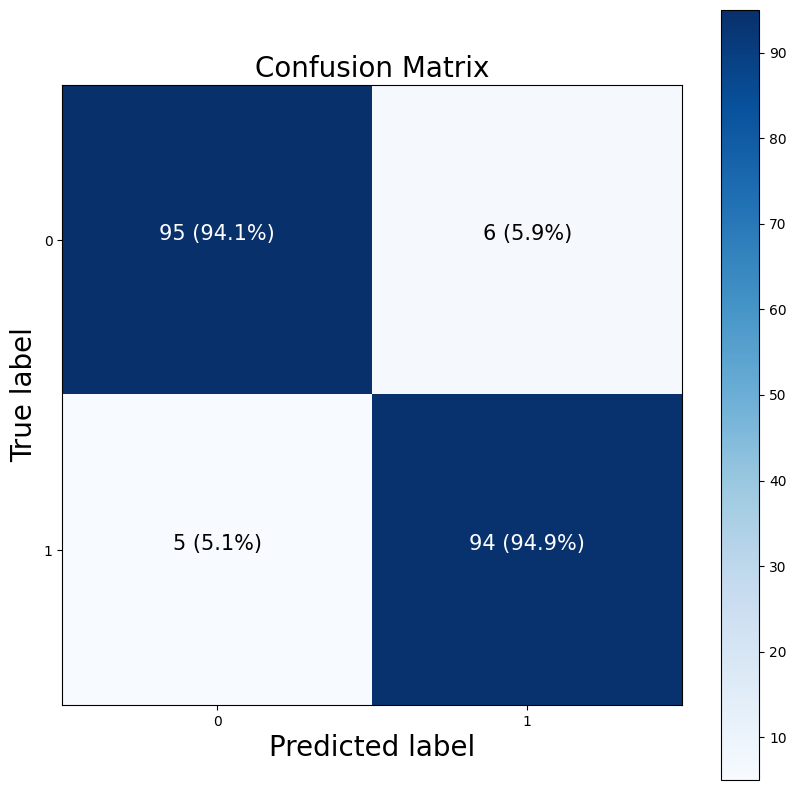

In [61]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)